In [1]:
# Import relevant files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#function to split data into training and test sets for model evaluation
from sklearn.model_selection import train_test_split
#model learns better when features are standardized to mean of 0 and s.d of 1
from sklearn.preprocessing import StandardScaler
#Extra Trees Regressor is an ensemble learning method based on decision trees. 
# It is used for regression tasks, where the goal is to predict a continuous value.
from sklearn.ensemble import ExtraTreesRegressor
#Stochaistic Gradient Descent Regressor algorithmn
from sklearn.linear_model import SGDRegressor
#SimpleImputer is used for handling missing data, by replacing missing value with a placeholder
#this placeholder can be the mean, median or most frequent value of a column
from sklearn.impute import SimpleImputer
#mutual_info_regression measures the dependency between variables
#this is used for feature selection in regression tasks (tasks where you have to predict a continious value)
from sklearn.feature_selection import mutual_info_regression
#rcParams is a way to set your preferences on how you want all your plots to appear
from matplotlib.pyplot import rcParams

In [2]:
#Calculates the mutual information scores between the input feature matrix and targets.

def make_mi_scores(X,y):
    #compute the mutual information scores
    mi_scores = mutual_info_regression(X,y)
    #using a pandas series allows us to get column/variable names to be labelled with the scores
    #data = mi_scores, name of series  = "MI Scores", index/label is the values in the X columns
    mi_scores = pd.Series(mi_scores,name = "MI Scores",index = X.columns)
    #sort mutual information scores in descending order
    #higher mutual information scores listed first, suggesting they have a stronger relationship
    #with the target variable
    mi_scores = mi_scores.sort_values(ascending = False)
    #returns sorted series of mutual information scores
    return mi_scores
#function to take the series of mutual information scores and plot a horizontal bar chart
def plot_mi_scores(scores):
    #we want the horizontal bar chat to have lowest MI scores at the bottom and highest MI scores at the top
    scores = scores.sort_values(ascending = True)
    #tells us how many bars we are going to need 
    width = np.arange(len(scores))
    #
    ticks = list(scores.index)
    #to plot with width on y, scores on x
    plt.barh(width, scores)
    #labelling
    plt.yticks(width,ticks)
    plt.title("Mutual Informarion Scores")

In [3]:
# Import the Dataset
df = pd.read_csv("train.csv")
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
# Check the datatypes and number of nulls in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [5]:
# Drop the heavily null columns
df.drop(columns = ["UvAerosolLayerHeight_aerosol_height", "UvAerosolLayerHeight_sensor_azimuth_angle", "UvAerosolLayerHeight_aerosol_pressure", "UvAerosolLayerHeight_aerosol_optical_depth", "UvAerosolLayerHeight_sensor_zenith_angle", "UvAerosolLayerHeight_solar_azimuth_angle", "UvAerosolLayerHeight_solar_zenith_angle"], inplace = True)

# Fill the remaining columns using an Imputer with means of each column
Imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
df_full = pd.DataFrame(Imputer.fit_transform(df.iloc[:,1:]), columns = df.columns[1:])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  float64
 3   week_no                                                   79023 non-null  float64
 4   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 7   SulphurDioxide_cloud_fraction                             79023 non-null  float64
 8   SulphurDioxide_s

In [6]:
df = df_full

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'week_no'}>,
        <Axes: title={'center': 'SulphurDioxide_SO2_column_number_density'}>,
        <Axes: title={'center': 'SulphurDioxide_SO2_column_number_density_amf'}>,
        <Axes: title={'center': 'SulphurDioxide_SO2_slant_column_number_density'}>,
        <Axes: title={'center': 'SulphurDioxide_cloud_fraction'}>],
       [<Axes: title={'center': 'SulphurDioxide_sensor_azimuth_angle'}>,
        <Axes: title={'center': 'SulphurDioxide_sensor_zenith_angle'}>,
        <Axes: title={'center': 'SulphurDioxide_solar_azimuth_angle'}>,
        <Axes: title={'center': 'SulphurDioxide_solar_zenith_angle'}>,
        <Axes: title={'center': 'SulphurDioxide_SO2_column_number_density_15km'}>,
        <Axes: title={'center': 'CarbonMonoxide_CO_column_number_density'}>,
        <Axes: title={'center': 'CarbonMonoxide_H2O_column_n

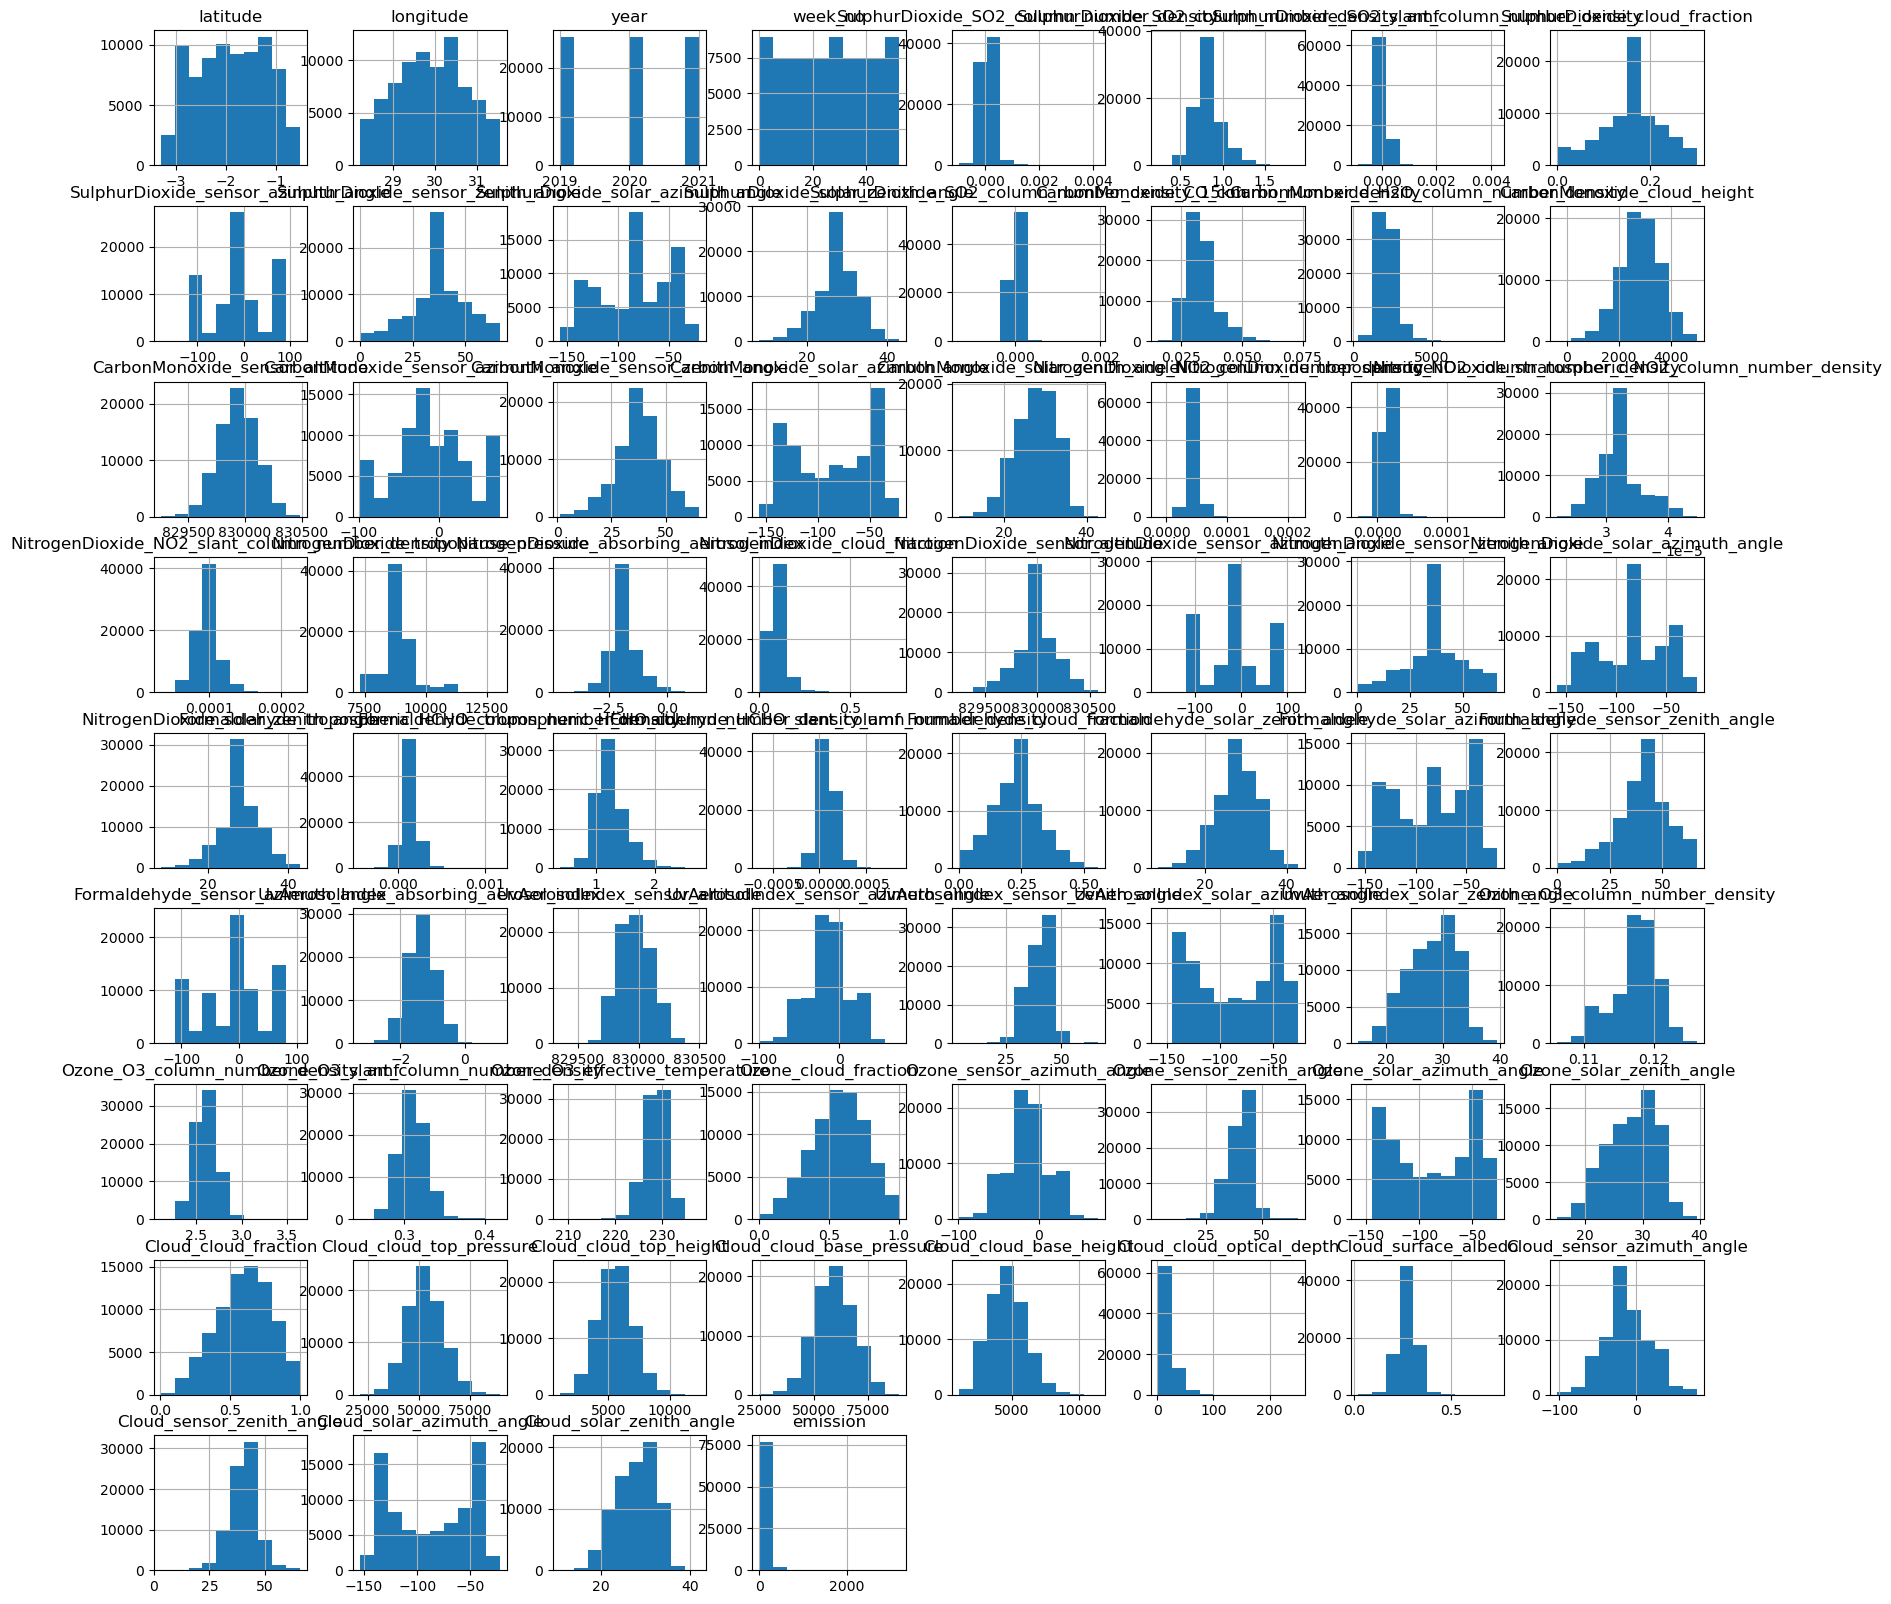

In [7]:
# Plot the distributions of the features
#y axis is frequency
#x axis are bins with range of values
rcParams.update({"figure.figsize":(20,20)})
df.hist()

(array([ 2415.,   288.,   676.,  2248.,  4995.,  7934., 15807., 33104.,
        11250.,   306.]),
 array([-6.90775528, -5.4109015 , -3.91404772, -2.41719394, -0.92034016,
         0.57651362,  2.0733674 ,  3.57022118,  5.06707496,  6.56392874,
         8.06078252]),
 <BarContainer object of 10 artists>)

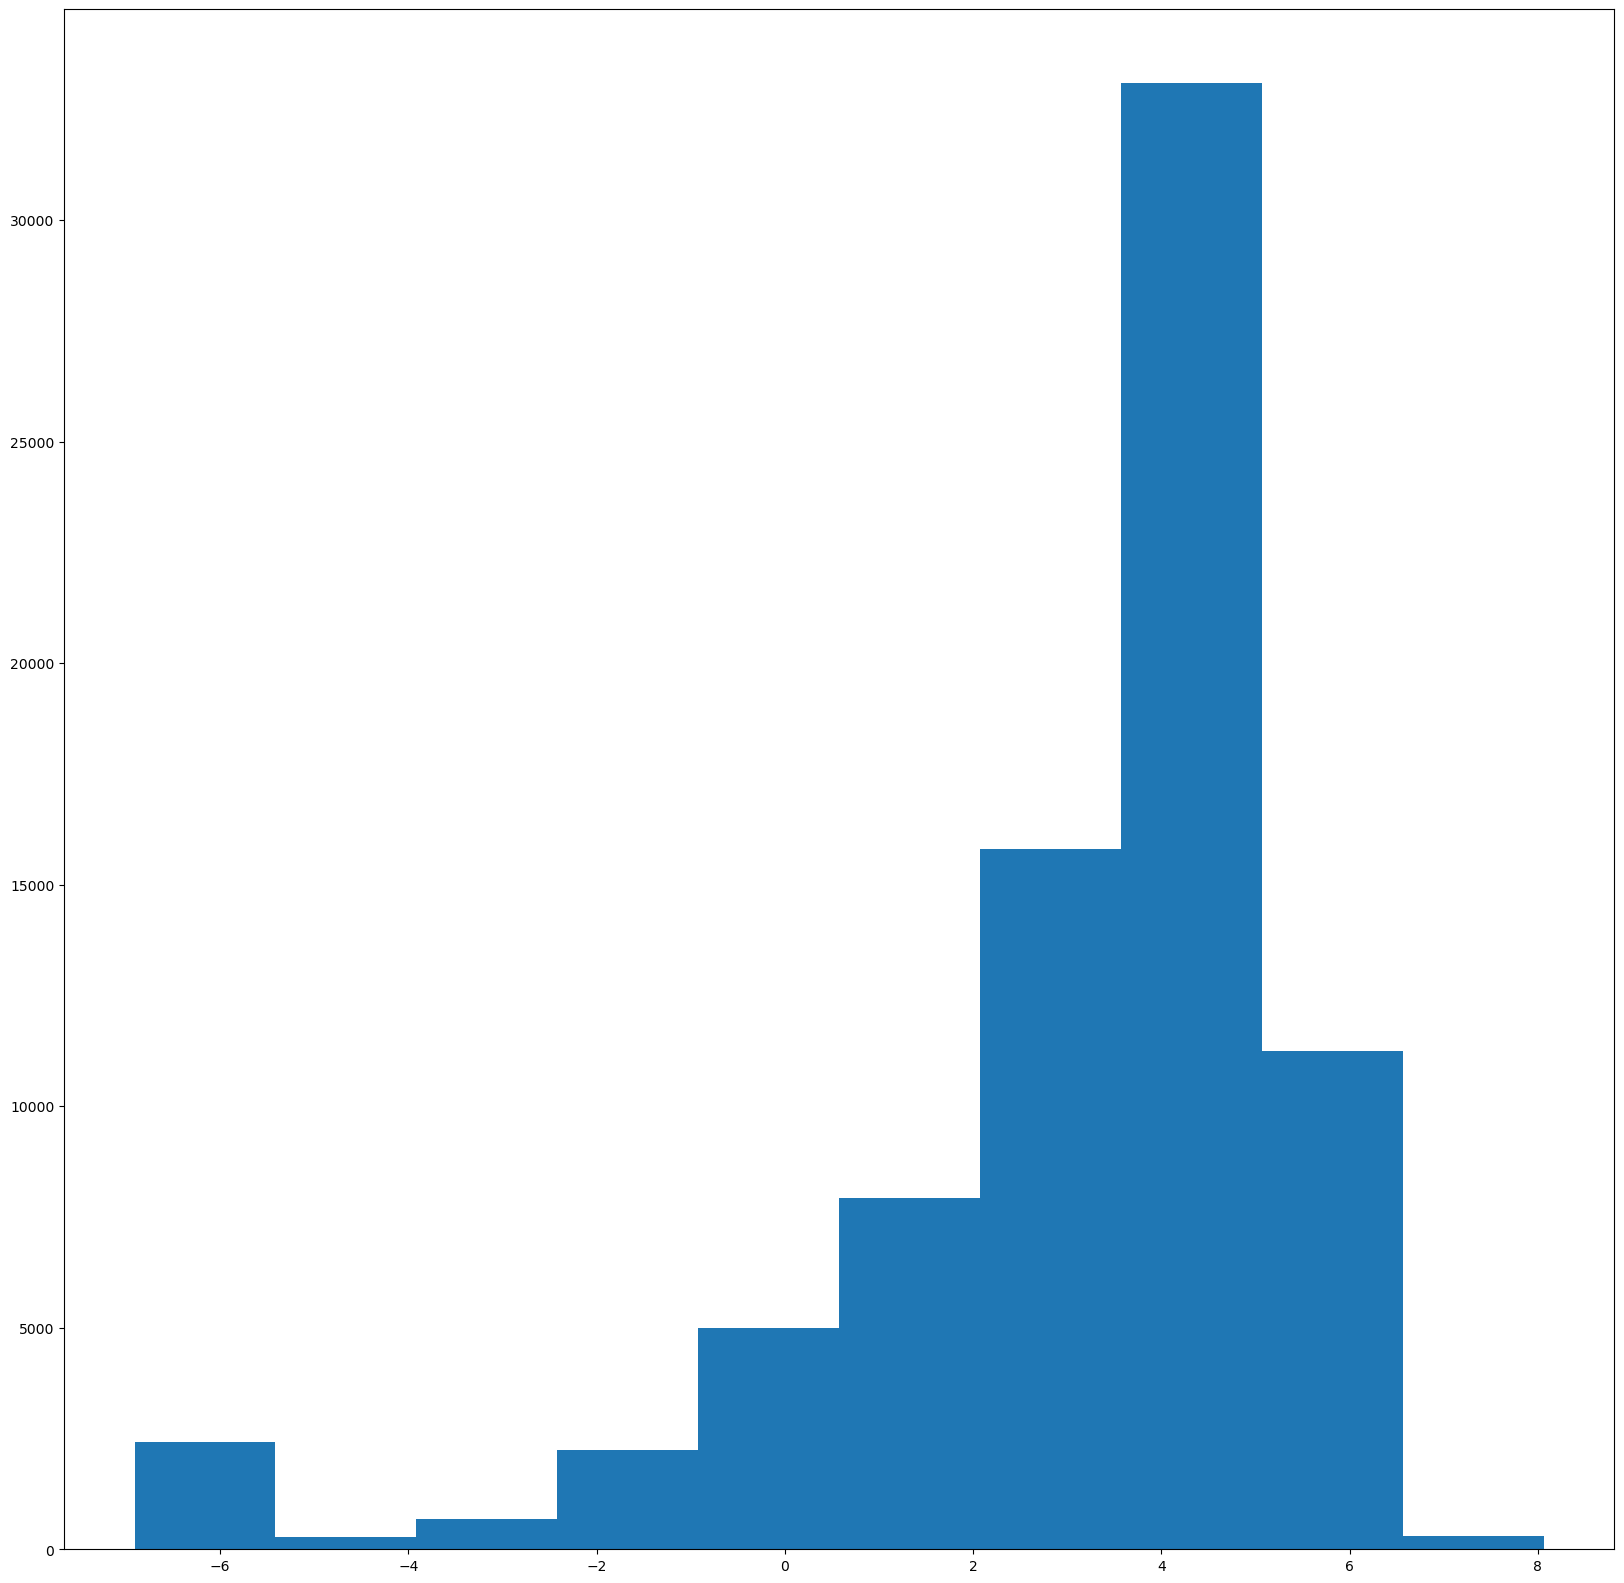

In [8]:
#Emissions is highly skewed, many small value counts, but not many large values hence log is appropriate
plt.hist(np.log(np.maximum(df["emission"].values, 1e-3)))

In [9]:
df["log_emission"] = np.log(np.maximum(df["emission"].values, 1e-3))

In [10]:
# Display the strength of the correlations between the target and features
#this line of code is used to find the top 20 features in the DataFrame df that have the strongest linear relationship
# (either positive or negative) with the column "log_emission", ignoring the original "emission" column. 
np.abs((df.iloc[:,1:].drop(columns = ["emission"]).corr())["log_emission"]).sort_values(ascending= False)[:20]
#You cannot get rid of the UV information as they are the strongest correlators.

log_emission                                                1.000000
longitude                                                   0.330417
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.087333
Cloud_cloud_fraction                                        0.073210
Ozone_cloud_fraction                                        0.071612
SulphurDioxide_SO2_column_number_density_15km               0.065902
SulphurDioxide_SO2_slant_column_number_density              0.064912
SulphurDioxide_SO2_column_number_density                    0.063695
CarbonMonoxide_H2O_column_number_density                    0.061726
CarbonMonoxide_cloud_height                                 0.061567
CarbonMonoxide_CO_column_number_density                     0.056875
Cloud_surface_albedo                                        0.055368
Formaldehyde_tropospheric_HCHO_column_number_density        0.042103
NitrogenDioxide_absorbing_aerosol_index                     0.040641
Cloud_cloud_optical_depth         

In [11]:
# How about mutual information scores?
#not limited to linear relationships; it can capture any kind of relationship, including non-linear ones
#dependency on log_emission
mi_scores = make_mi_scores(df.drop(columns = ["emission"]), df["log_emission"])
mi_scores.iloc[1:20]

longitude                                                   2.353088
latitude                                                    2.349981
NitrogenDioxide_tropopause_pressure                         0.054394
Ozone_sensor_azimuth_angle                                  0.051331
UvAerosolIndex_sensor_azimuth_angle                         0.051083
UvAerosolIndex_sensor_altitude                              0.050114
Cloud_surface_albedo                                        0.046172
Ozone_solar_azimuth_angle                                   0.037451
UvAerosolIndex_solar_azimuth_angle                          0.037332
UvAerosolIndex_sensor_zenith_angle                          0.035026
Ozone_sensor_zenith_angle                                   0.034169
CarbonMonoxide_H2O_column_number_density                    0.030844
Formaldehyde_sensor_zenith_angle                            0.028292
Cloud_sensor_azimuth_angle                                  0.028051
Formaldehyde_tropospheric_HCHO_col

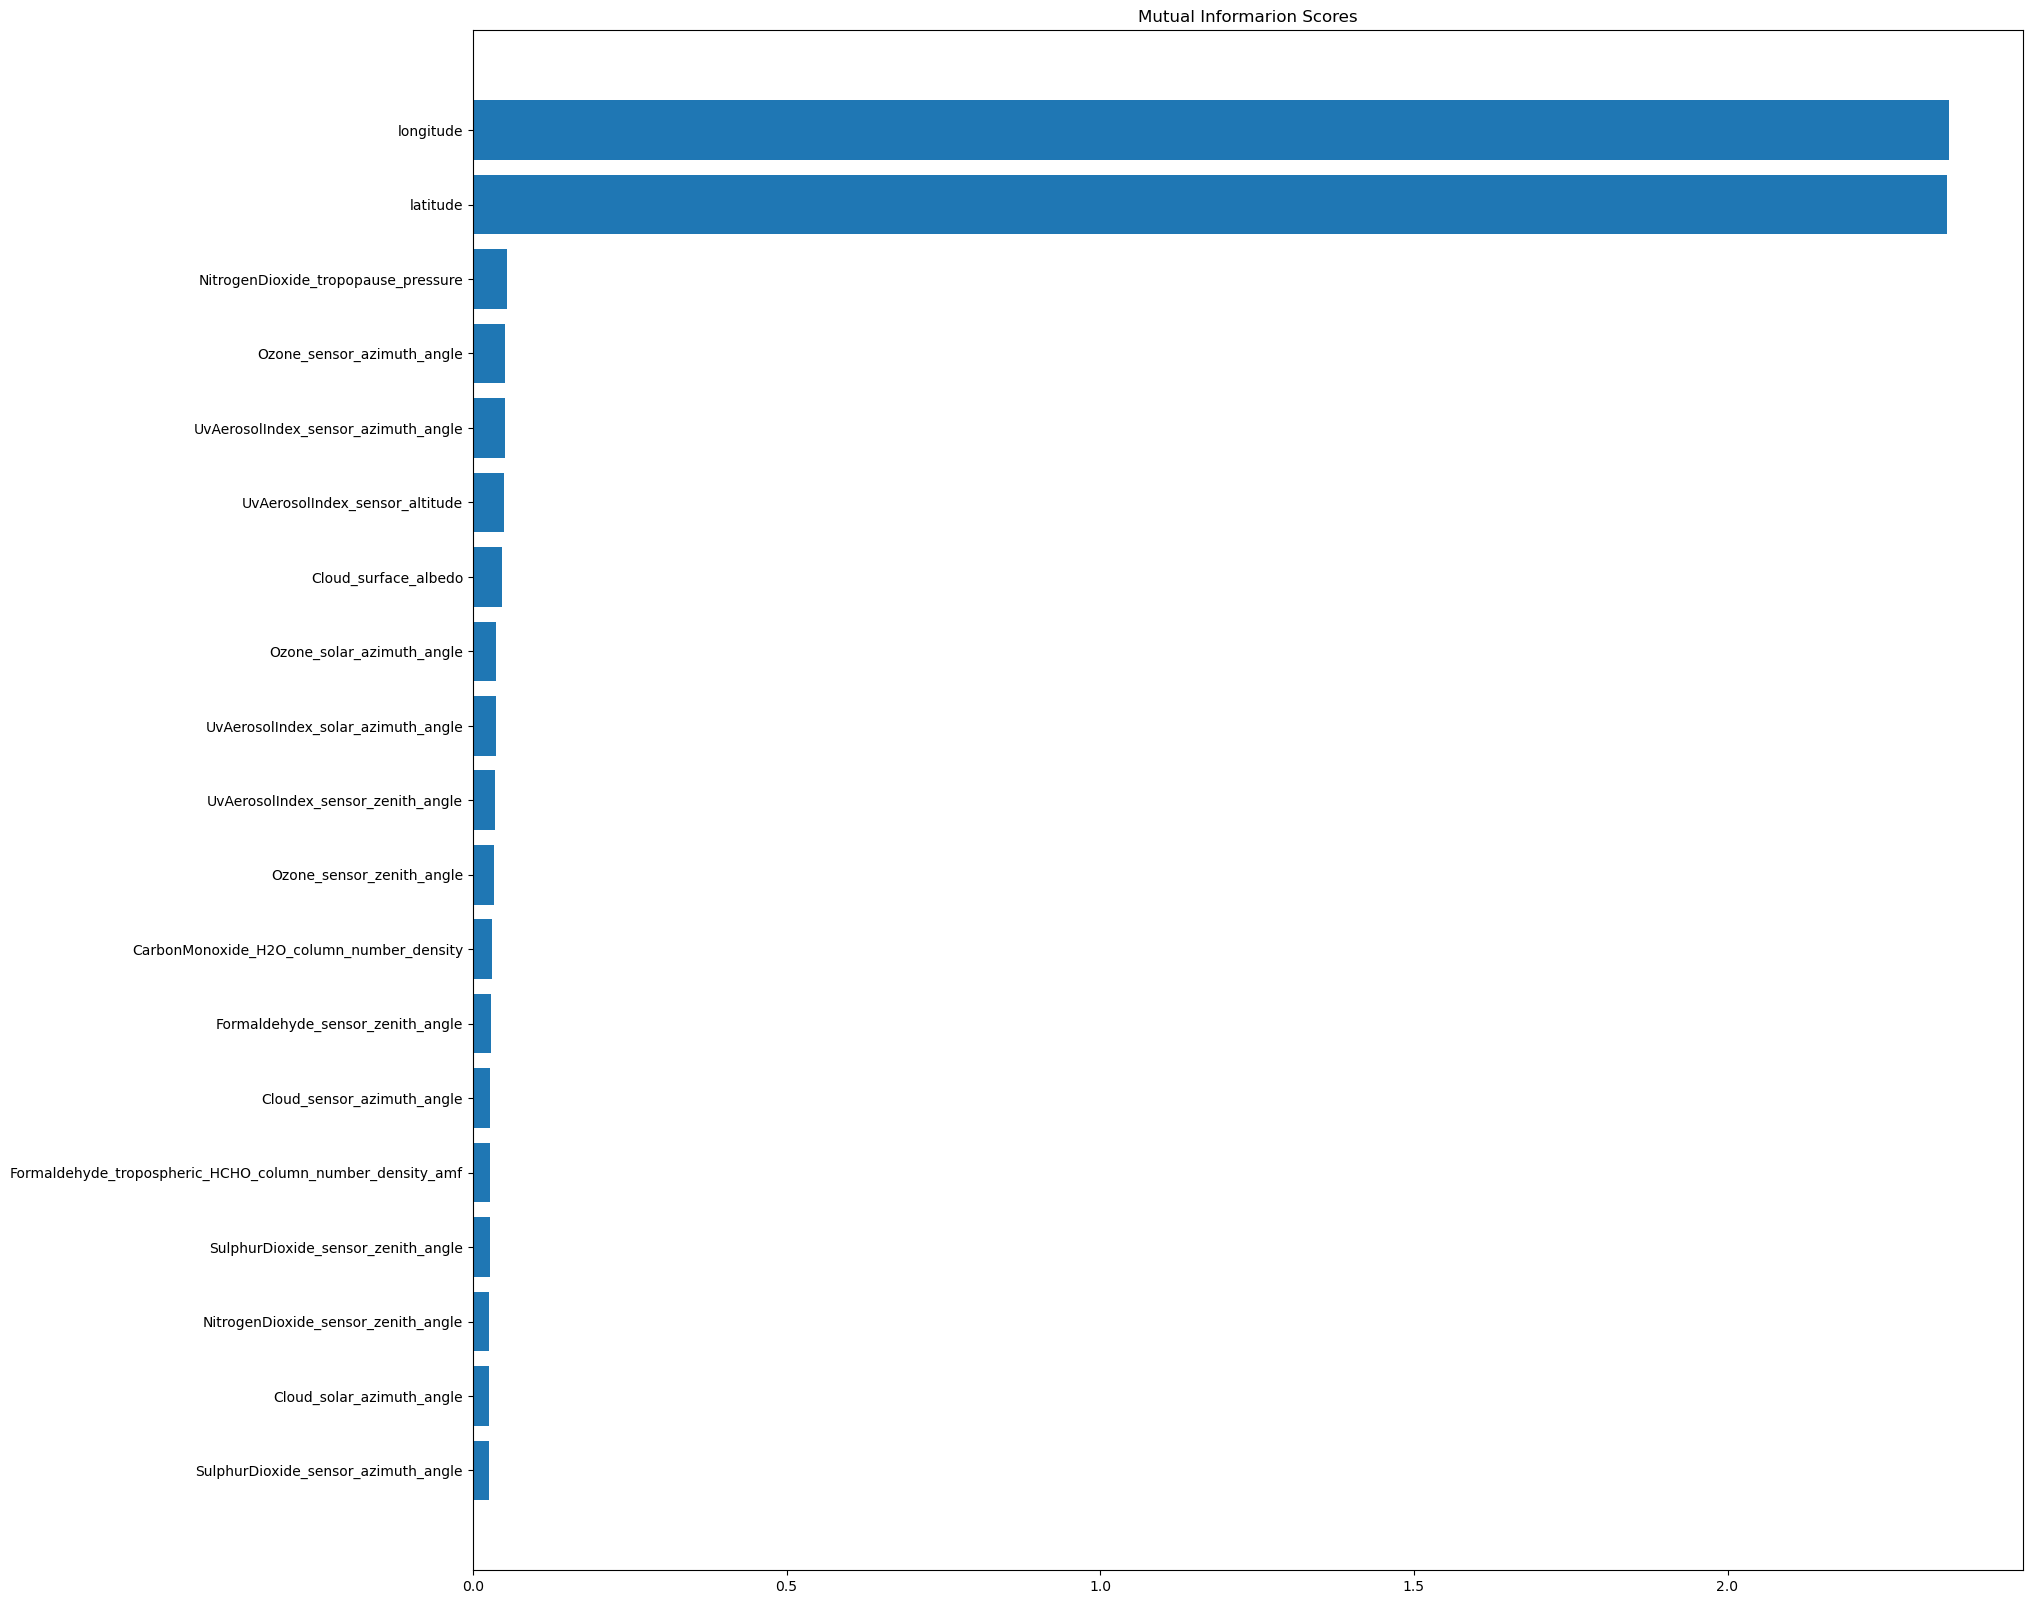

In [12]:
plot_mi_scores(mi_scores[1:20])

In [13]:
#selecting the names of the top 20 features from a DataFrame df that have the strongest 
#absolute linear correlation with the column "log_emission"
Interesting_Features = list(np.abs((df.iloc[:,1:].drop(columns = ["emission"]).corr())["log_emission"]).sort_values(ascending= False)[:20].index)

In [14]:
#after selecting the most interesting features based on their correlation with "log_emission", 
#we then creates a new DataFrame with just those feature
df_Strongest  = df[Interesting_Features] # Create a dataset containing these features and the target

array([[<Axes: xlabel='log_emission', ylabel='log_emission'>,
        <Axes: xlabel='longitude', ylabel='log_emission'>,
        <Axes: xlabel='Formaldehyde_tropospheric_HCHO_column_number_density_amf', ylabel='log_emission'>,
        <Axes: xlabel='Cloud_cloud_fraction', ylabel='log_emission'>,
        <Axes: xlabel='Ozone_cloud_fraction', ylabel='log_emission'>,
        <Axes: xlabel='SulphurDioxide_SO2_column_number_density_15km', ylabel='log_emission'>,
        <Axes: xlabel='SulphurDioxide_SO2_slant_column_number_density', ylabel='log_emission'>,
        <Axes: xlabel='SulphurDioxide_SO2_column_number_density', ylabel='log_emission'>,
        <Axes: xlabel='CarbonMonoxide_H2O_column_number_density', ylabel='log_emission'>,
        <Axes: xlabel='CarbonMonoxide_cloud_height', ylabel='log_emission'>,
        <Axes: xlabel='CarbonMonoxide_CO_column_number_density', ylabel='log_emission'>,
        <Axes: xlabel='Cloud_surface_albedo', ylabel='log_emission'>,
        <Axes: xlabel='For

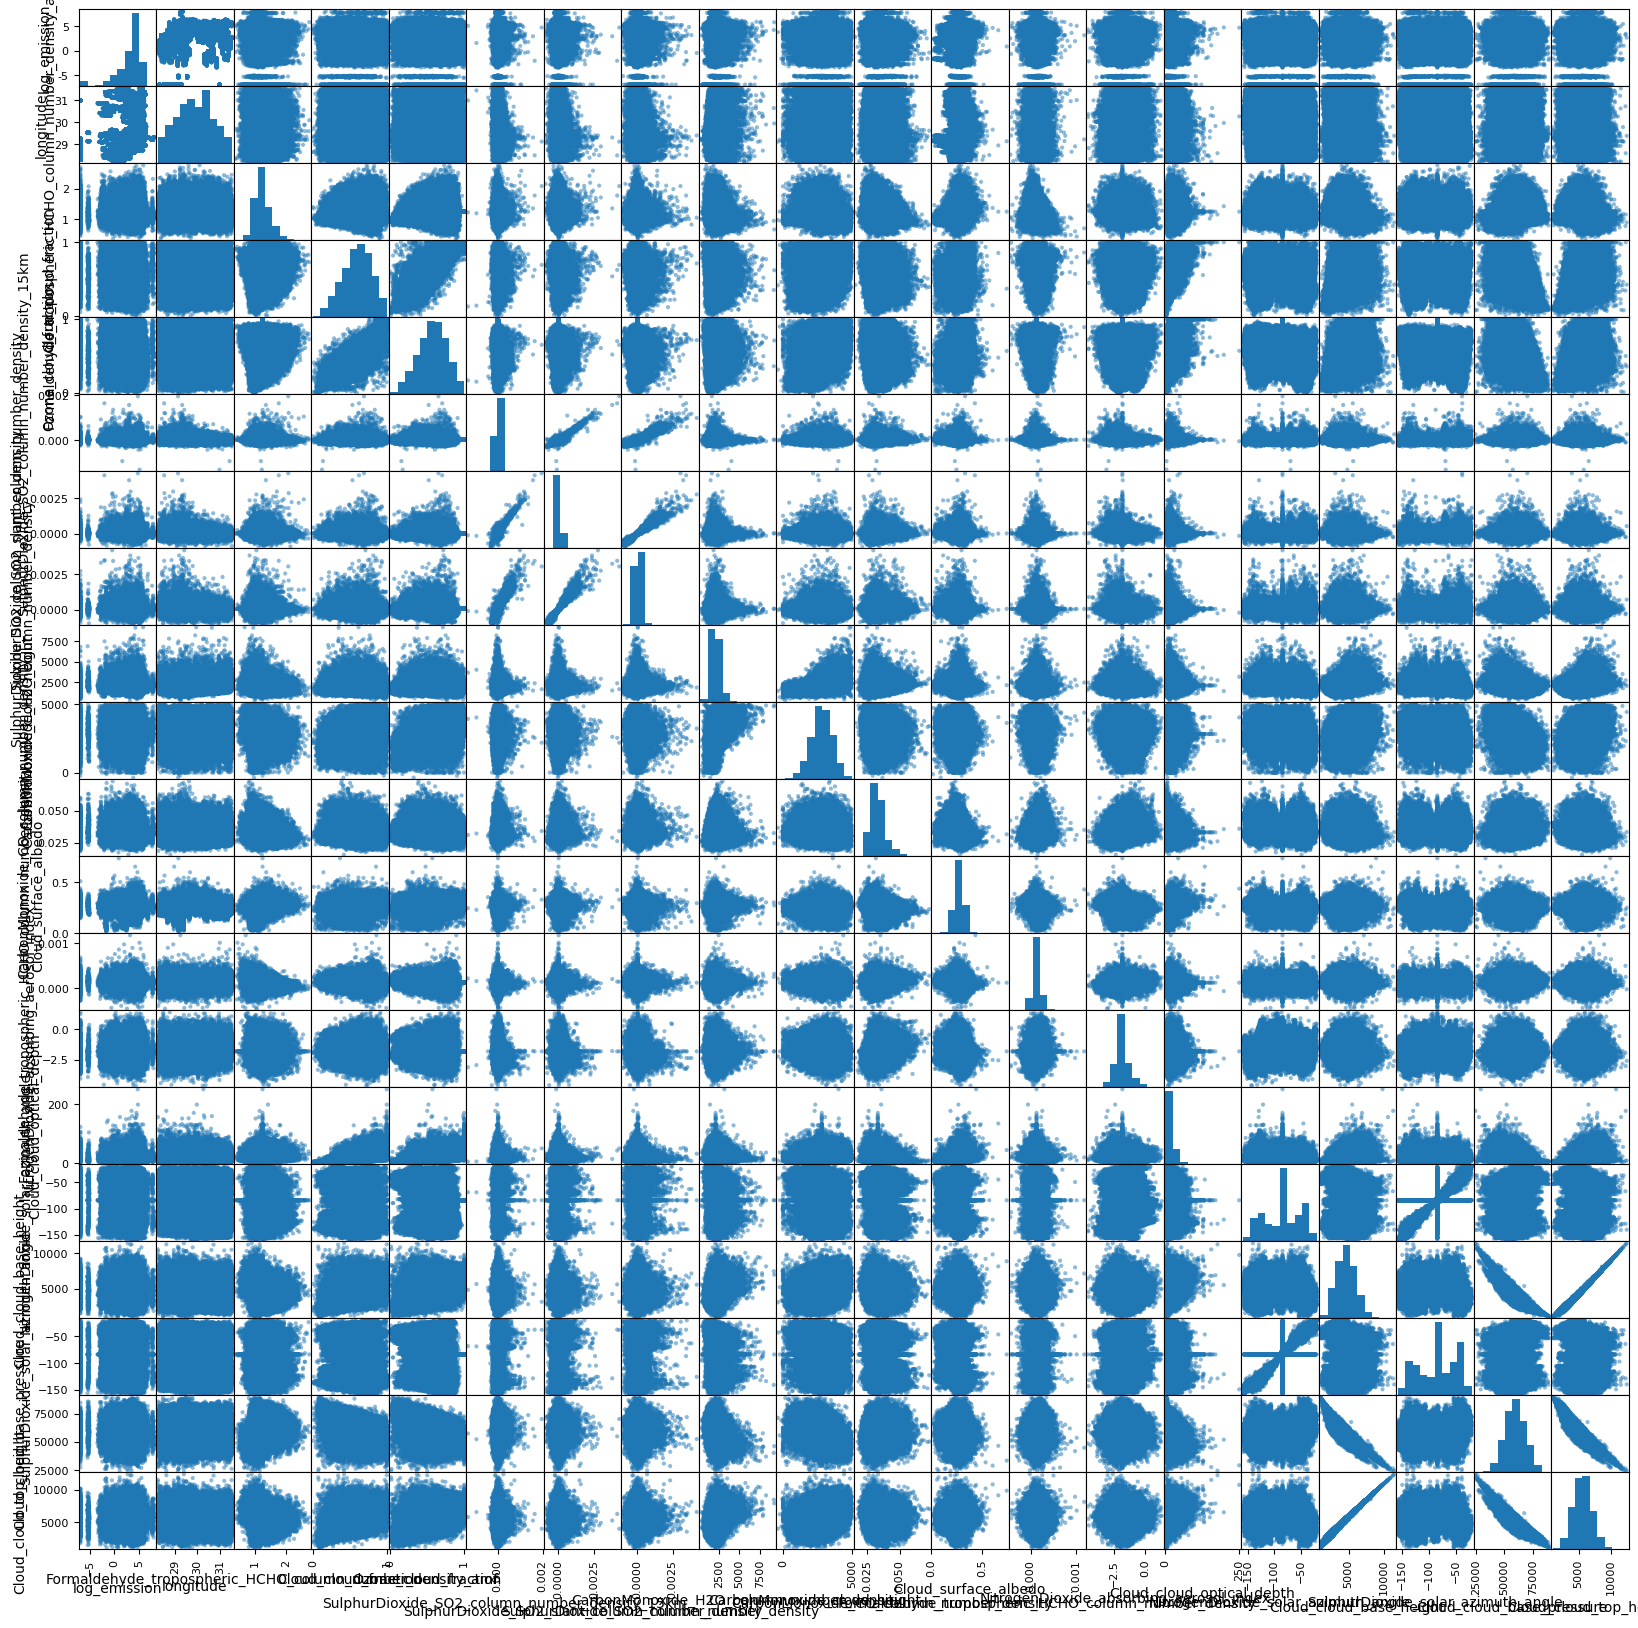

In [15]:
# Show the scatterplots between the features and target
#Q - Scatterplot plots every variable against another variable but shows a histogram istead of plotting against itself as seen on the diagonal
pd.plotting.scatter_matrix(df_Strongest)

In [16]:
# Conclusion, the linear correlations between the target and the features do not exist and so linear regression will not work.
#if you look at the top row where y = log_emissions
X = df.drop(columns = ["emission", "log_emission"])
#we now have two target variables
y = df[["emission", "log_emission"]]
#The dataset is split into training and validation sets, 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [17]:
"""Demonstration that the linear correlations for the model are too low for proper convergence
#and an SGDRegressor with an elastic net penalty is trained on the data.
#An SGDRegressor with an elastic net penalty is a type of linear regression model that is trained using Stochastic Gradient Descent (SGD) 
#and regularized with both L1 and L2 norms, combining the properties of Ridge and Lasso regression 
#to prevent overfitting and help in feature selection."""
Regressor = SGDRegressor(learning_rate="optimal", penalty = "elasticnet", random_state=42)
Regressor.fit(X_train, y_train.iloc[:,1])
print(Regressor.score(X_train,y_train.iloc[:,1]))
print(Regressor.score(X_valid, y_valid.iloc[:,1]))

#scores show how poorly the model scores

-1.170615120903793e+41
-1.1725513217725802e+41


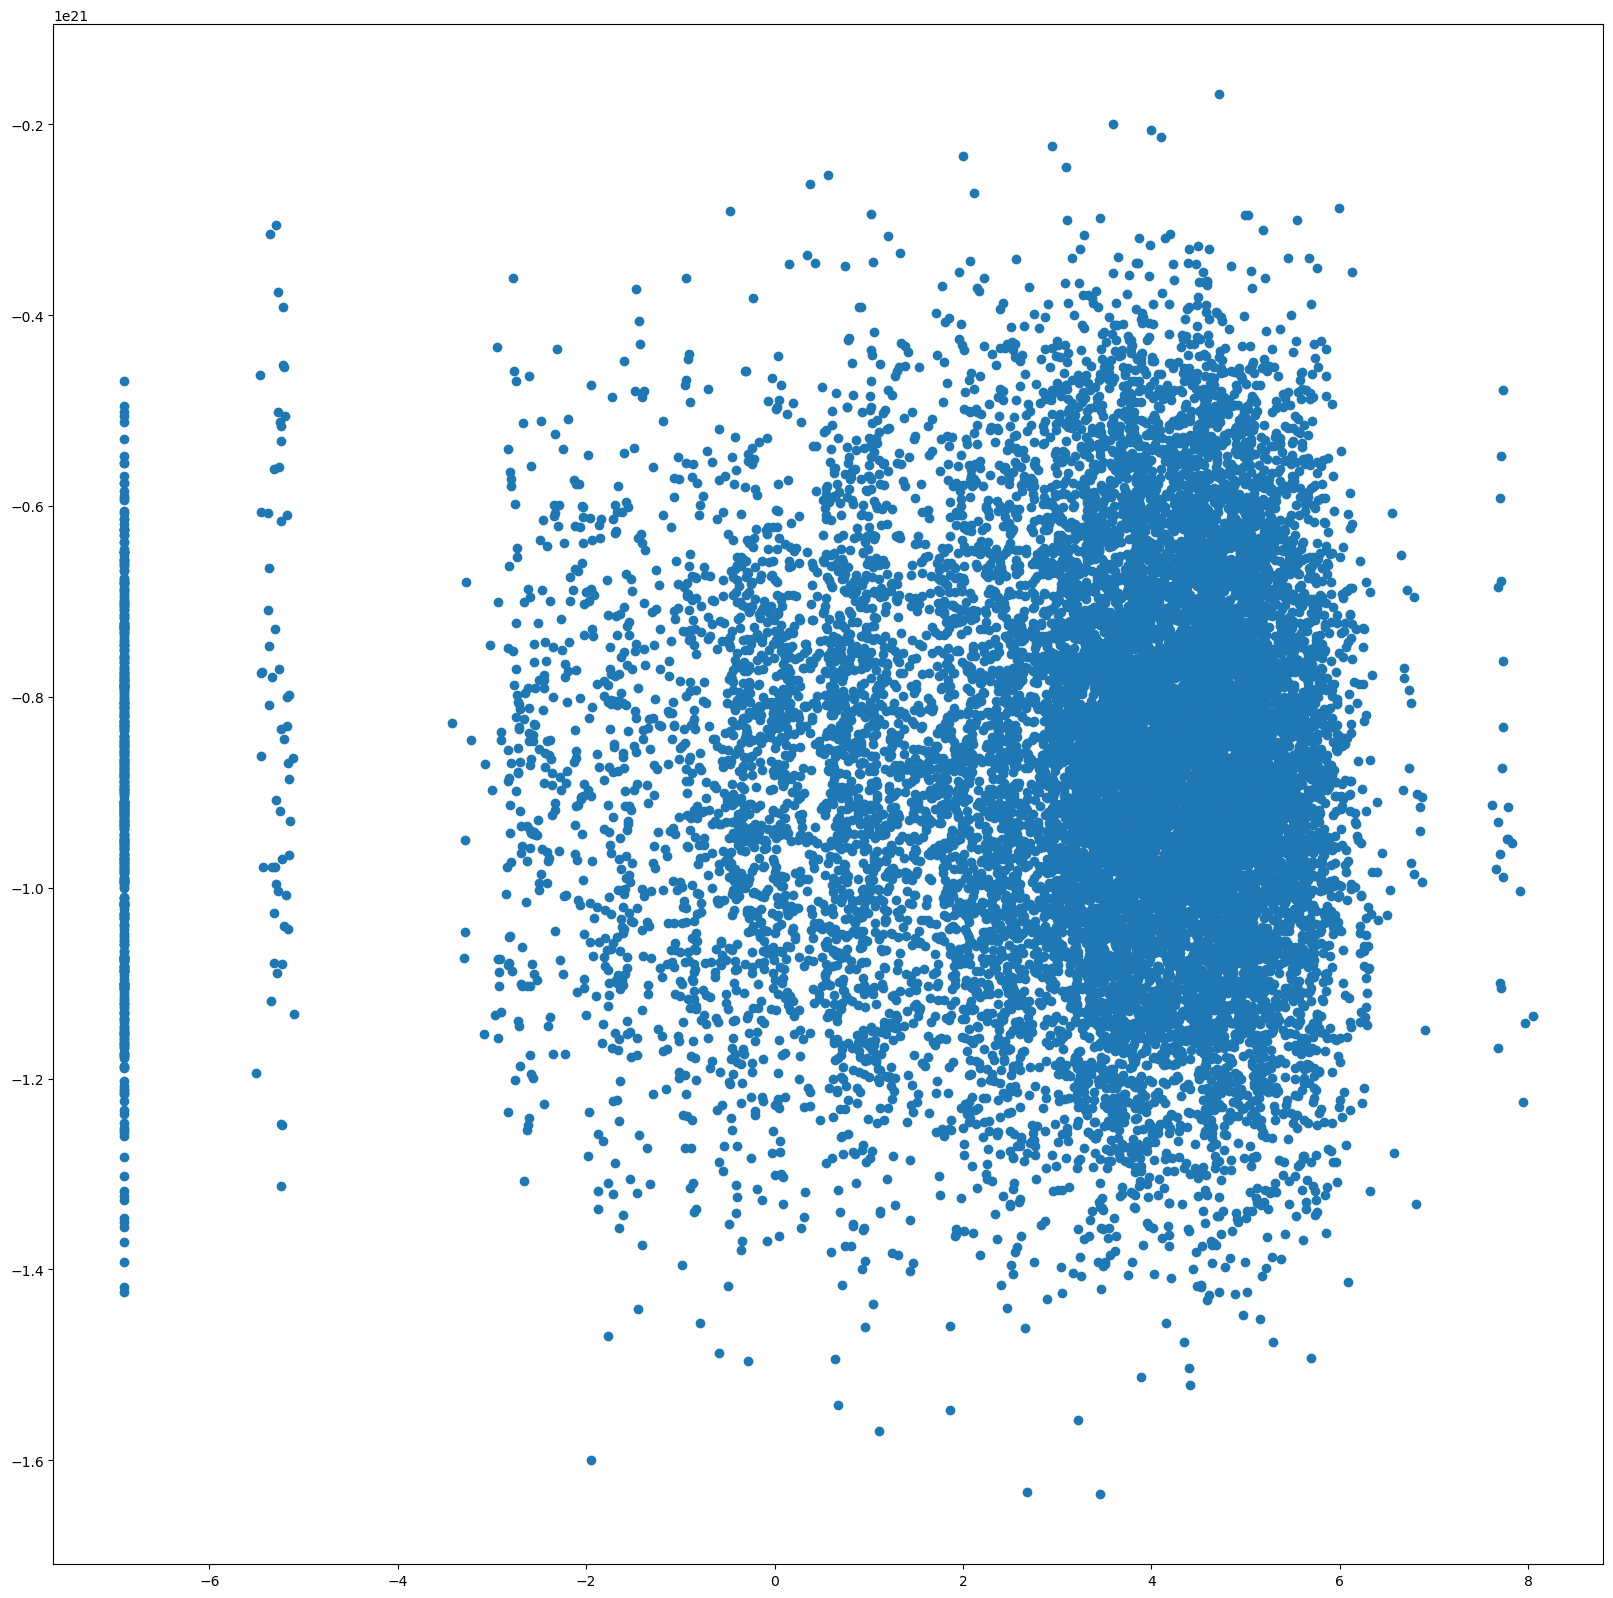

In [18]:
#Scatterplot to compare predicted values against the actual target values 
y_predictions = Regressor.predict(X_valid)
plt.scatter(y_valid.iloc[:,1], y_predictions)

In [19]:
# Ensure no data leakage
make_mi_scores(X_train, y_train.iloc[:,1])

longitude                                                 2.312952
latitude                                                  2.306477
UvAerosolIndex_sensor_altitude                            0.050278
NitrogenDioxide_tropopause_pressure                       0.049286
UvAerosolIndex_sensor_azimuth_angle                       0.048528
                                                            ...   
NitrogenDioxide_tropospheric_NO2_column_number_density    0.007964
SulphurDioxide_SO2_slant_column_number_density            0.007857
Formaldehyde_HCHO_slant_column_number_density             0.007266
Formaldehyde_cloud_fraction                               0.006510
NitrogenDioxide_NO2_slant_column_number_density           0.006066
Name: MI Scores, Length: 67, dtype: float64

In [20]:
# Alternative Solution (Consider non-linear solutions):
#Using a type of ensemble learning method using 200 decision trees
ExtraRandomForest = ExtraTreesRegressor(n_estimators= 200, random_state = 42)
#Model trained on the training data
ExtraRandomForest.fit(X_train, y_train)
#Evaluated on both training and validation datasets
print(ExtraRandomForest.score(X_train, y_train))
print(ExtraRandomForest.score(X_valid, y_valid))

1.0
0.9779027092320459


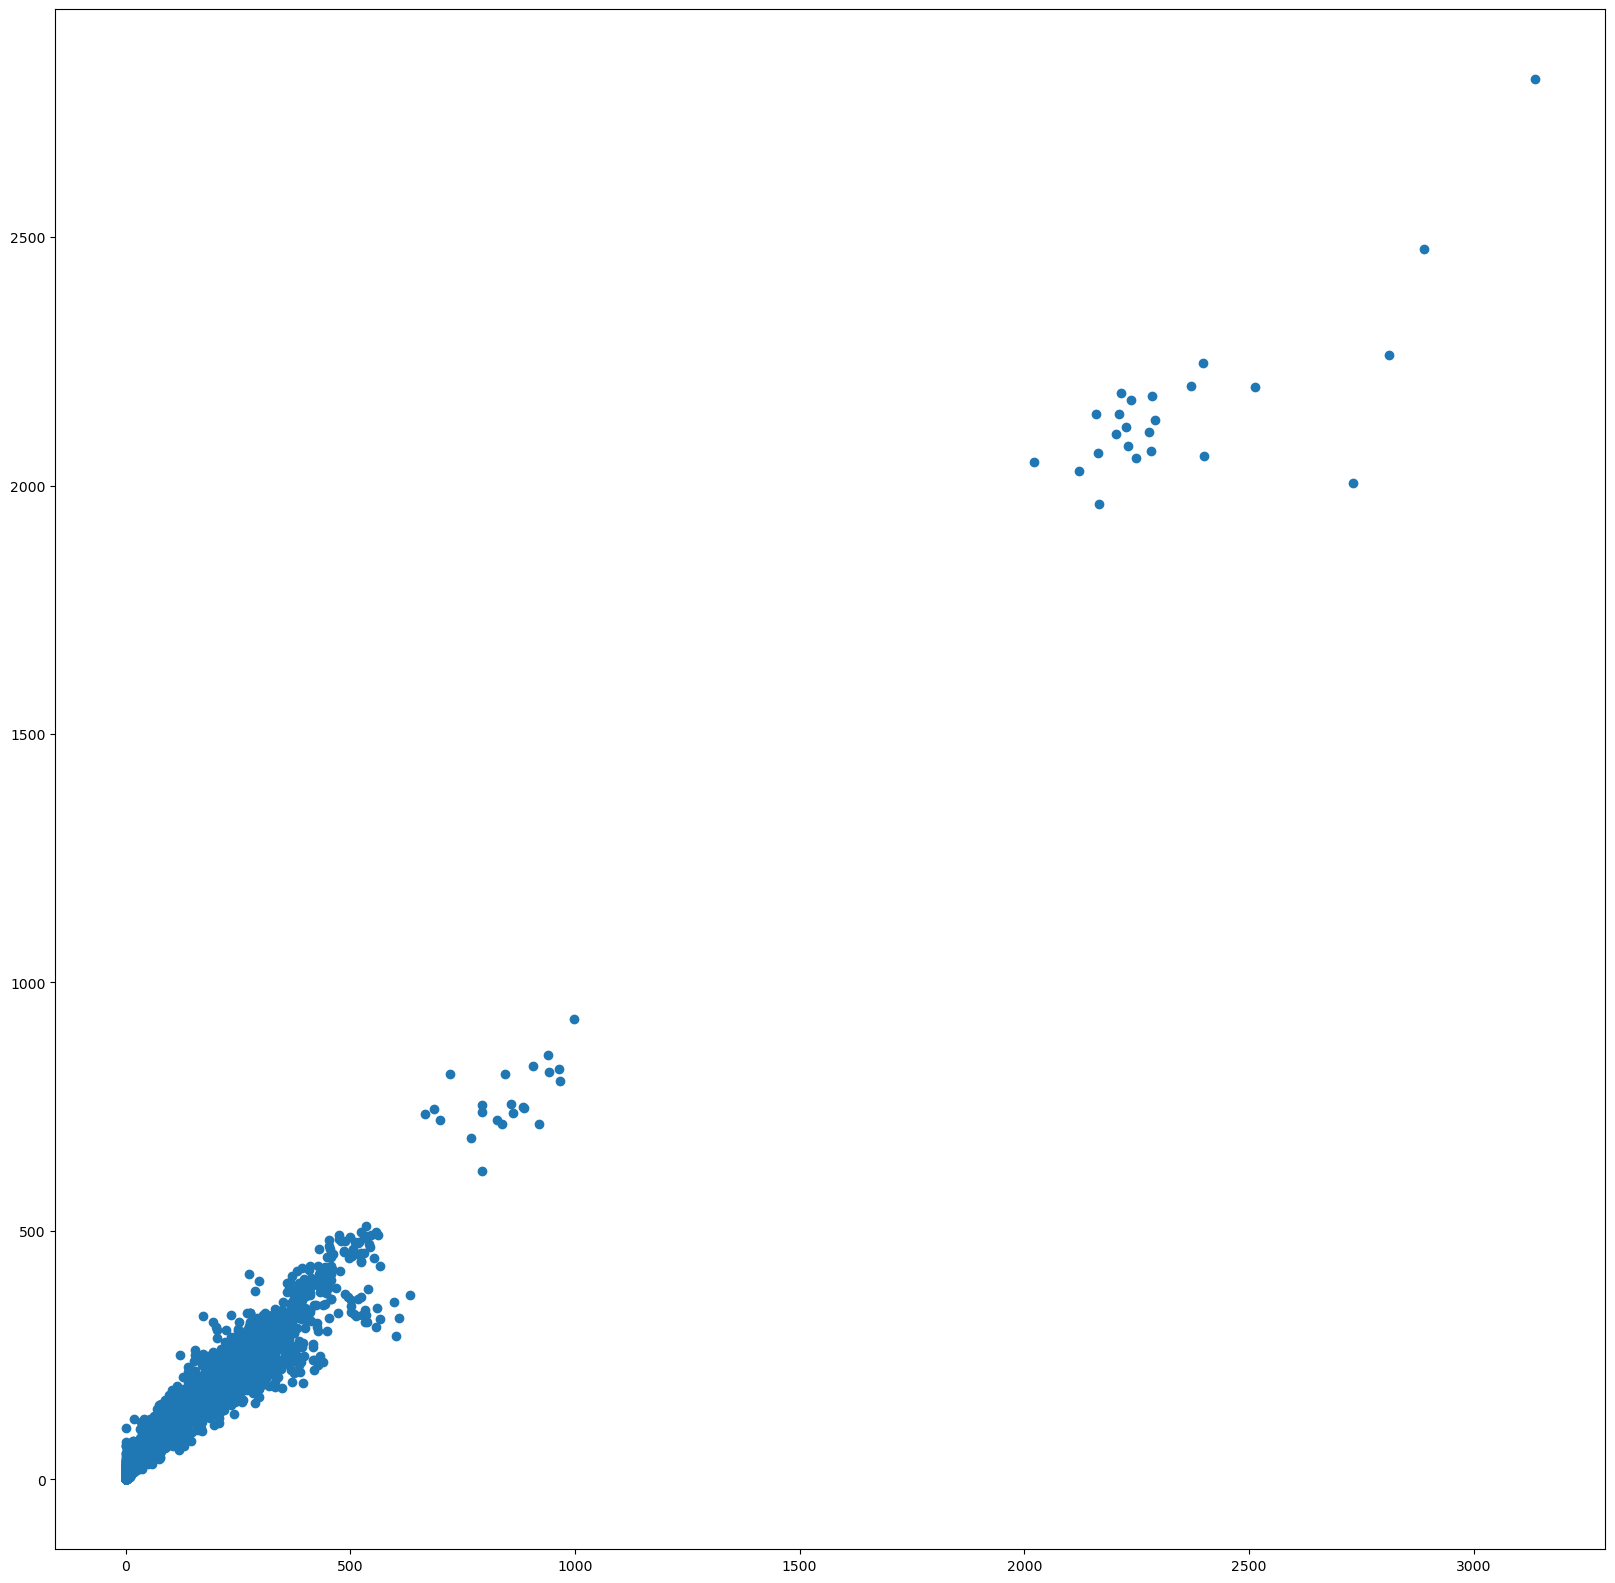

In [21]:
#y_pred vs y_actual for validation set
#using a scatter plot  for original emissions

y_predictions = ExtraRandomForest.predict(X_valid)
plt.scatter(y_valid.iloc[:,0], y_predictions[:,0])

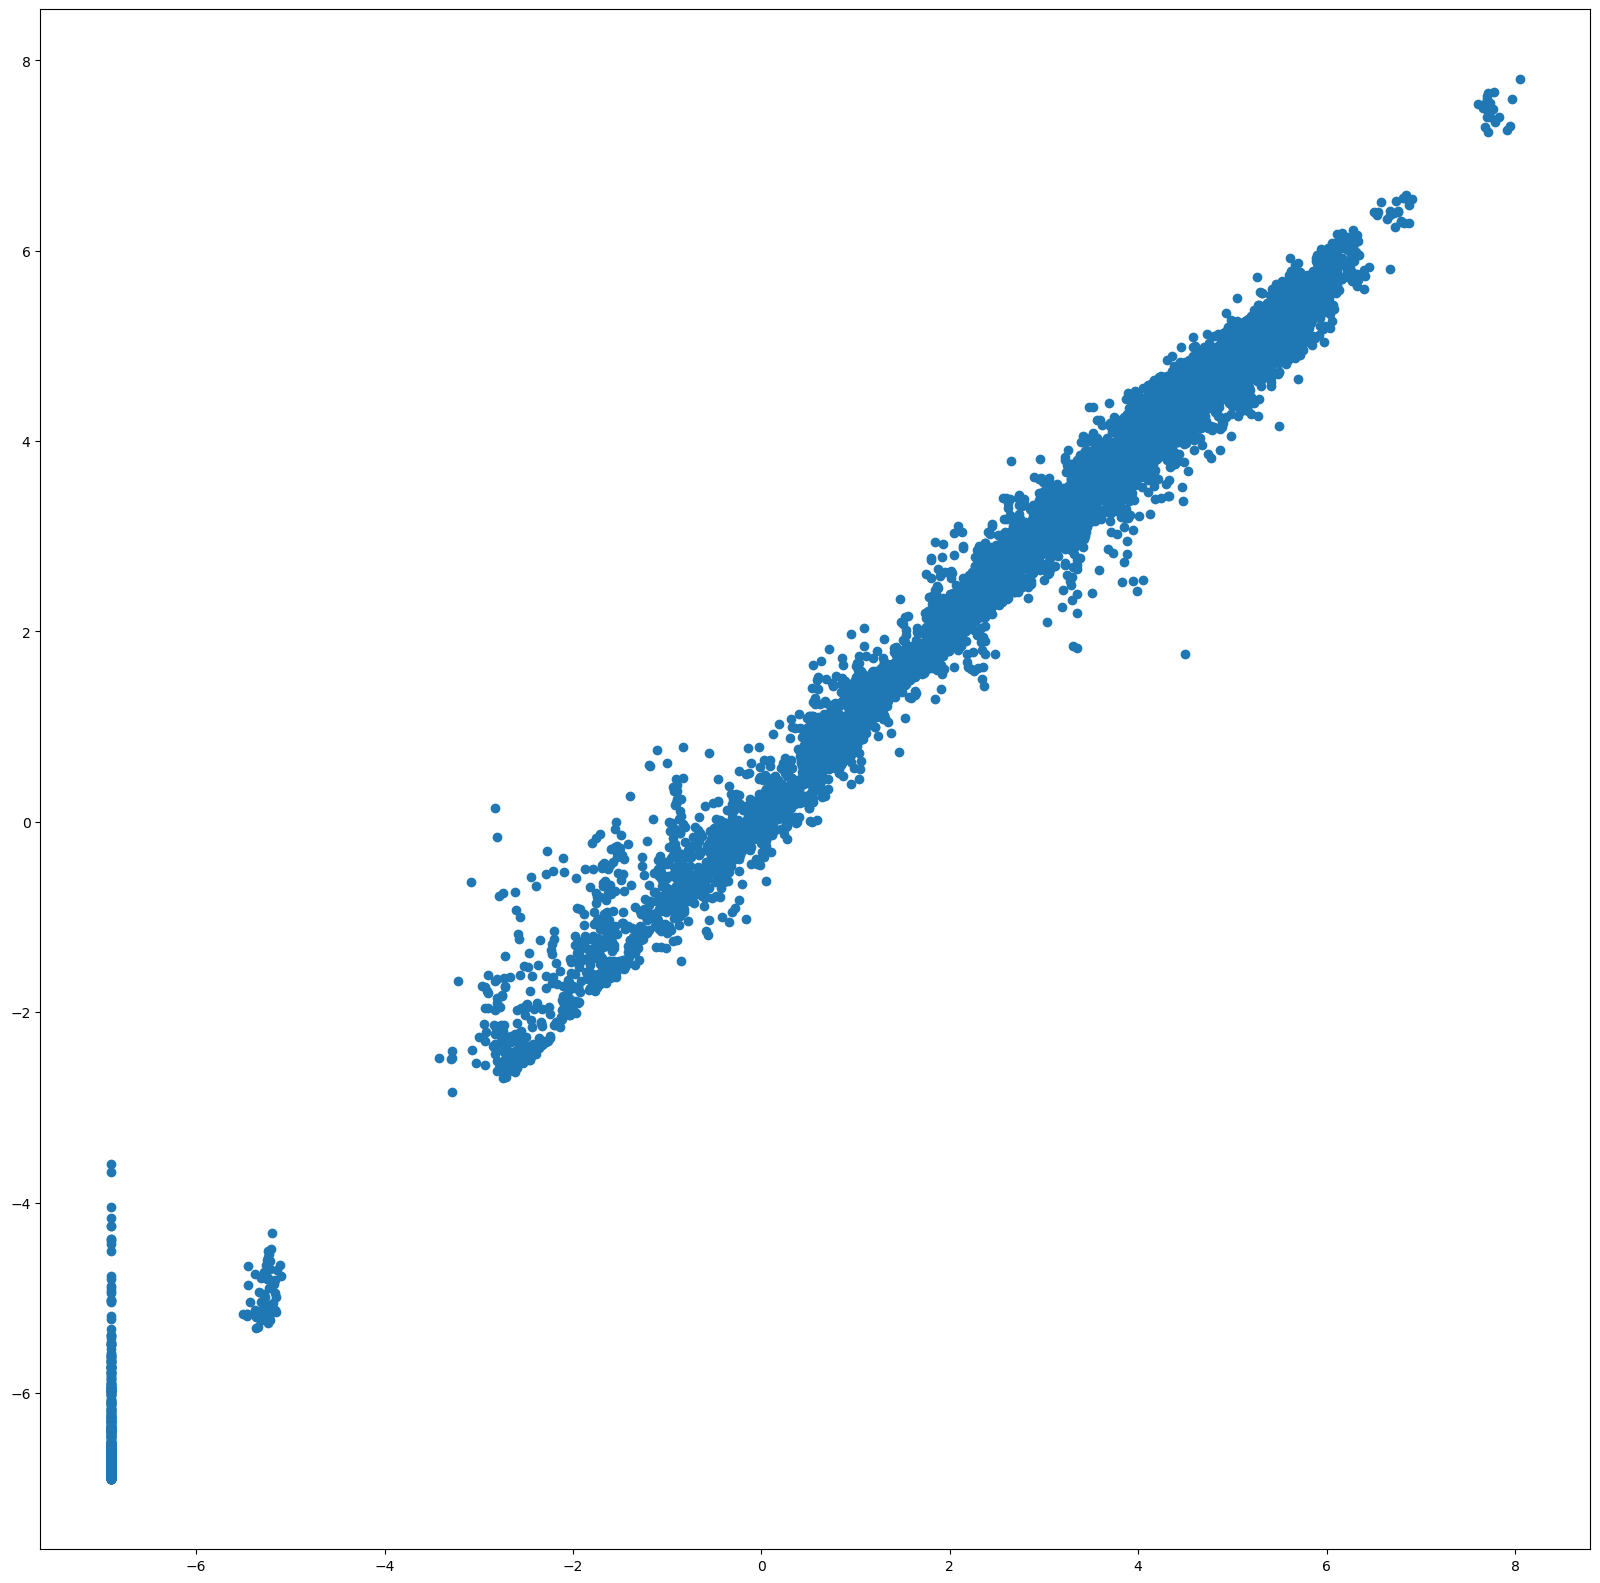

In [22]:
#y_pred vs y_actual for validation set
#using a scatter plot  for log emissions
y_predictions = ExtraRandomForest.predict(X_valid)
plt.scatter(y_valid.iloc[:,1], y_predictions[:,1])